# Analysis of three csv-detective manual annotations


Anthony (AA), Geoffrey (GA) and Pavel (PS) annotated the same set of datagouvfr-csvs' columns separately in order to test the performance of the csv-detective tool. Here I joind them to recover their metadata (file originally shared by Anthony), computed the agreement score (cohens kappa) and save a new dataset with a majority vote for each annotation type ("new" and "old").

In [59]:
import pandas as pd
from itertools import combinations
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 8]

In [3]:
original_label_df = pd.read_csv("sample_labellisation.csv")
AA_labels = pd.read_csv("labelisation_notNAsample_filtered_AA.csv").rename(columns={'id_original':'id'})
GA_labels = pd.read_csv("labelisation_notNAsample_filtered_GA.csv").rename(columns={'id_original':'id'})
PS_labels = pd.read_csv("labelisation_notNAsample_filtered_Pavel.csv").rename(columns={'id_original':'id'})


In [5]:
all_labelisations = {"sample_labelisation_AA":AA_labels,
                     "sample_labelisation_GA":GA_labels,
                     "sample_labelisation_PS":PS_labels}
for name, df in all_labelisations.items():
    joined = pd.merge(left=original_label_df, right=df[["id", "old_types_annotation", "new_types_annotation"]],
                how='left', left_on="id", right_on="id")
    joined.insert(1, "new_types_annotation", joined.pop("new_types_annotation"))
    joined.insert(2, "old_types_annotation", joined.pop("old_types_annotation"))
    joined.to_csv(f"{name}.csv", index=False)
    

In [6]:
AA_labels_j = pd.read_csv("sample_labelisation_AA.csv")
GA_labels_j = pd.read_csv("sample_labelisation_GA.csv")
PS_labels_j = pd.read_csv("sample_labelisation_PS.csv")
all_combinations = list(combinations([AA_labels_j, GA_labels_j, PS_labels_j], 2))


In [7]:
from sklearn.metrics import cohen_kappa_score

In [8]:
avg_new_types_agreement = 0
for annotateur1, annotateur2 in all_combinations:
    avg_new_types_agreement += cohen_kappa_score(annotateur1.new_types_annotation.fillna("na").values,
                      annotateur2.new_types_annotation.fillna("na").values)
    
avg_new_types_agreement = avg_new_types_agreement / len(all_combinations)
print(avg_new_types_agreement)

0.6397397391106159


#### The avg cohens kappa interagreement for new types is 0.64

In [9]:
avg_old_types_agreement = 0
for annotateur1, annotateur2 in all_combinations:
    avg_old_types_agreement += cohen_kappa_score(annotateur1.old_types_annotation.fillna("na").values,
                      annotateur2.old_types_annotation.fillna("na").values)
    
avg_old_types_agreement = avg_old_types_agreement / len(all_combinations)
print(avg_old_types_agreement)

0.8638480834659386


#### The avg cohens kappa interagreement for old types is 0.86

### How do we disagree when we disagree ?

In [10]:
old_types_annotations = pd.DataFrame(list(zip(AA_labels_j.old_types_annotation,
                                     GA_labels_j.old_types_annotation,
                                     PS_labels_j.old_types_annotation)), columns=["AA", "GA", "PS"])
new_types_annotations = pd.DataFrame(list(zip(AA_labels_j.new_types_annotation,
                                     GA_labels_j.new_types_annotation,
                                     PS_labels_j.new_types_annotation)), columns=["AA", "GA", "PS"])

In [11]:
def print_disagreements(df, type_):
    print(f"***** {type_} types disagreements *****\n\n")
    for idx, row in df.iterrows():
        if len(set(row.values)) == 1:
            if pd.isna(row[0]):
                continue
            print(f"We all have the same annotation {row[0]} !!")
        else:
            for name in row.index:
                print(f"{name} said {row[name]}")
        print(f"\nThe sample of this column is {PS_labels_j.loc[idx].shuffle_serie}")
        print("\n", "****" *20, "\n")

    
    

#### Old types disagreements/agreements

In [12]:
print_disagreements(old_types_annotations, "old")

***** old types disagreements *****


AA said booleen
GA said booleen
PS said nan

The sample of this column is ["0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0"]

 ******************************************************************************** 

We all have the same annotation departement !!

The sample of this column is ["DOUBS", "GARD", "HAUTE-SAONE", "CHARENTE-MARITIME", "PYRENEES-ATLANTIQUES", "VAL-DE-MARNE", "ISERE", "LOT-ET-GARONNE", "HAUTE-GARONNE", "SEINE-SAINT-DENIS", "VAUCLUSE", "NORD", "SEINE-MARITIME", "SEINE-SAINT-DENIS", "PYRENEES-ATLANTIQUES", "MAINE-ET-LOIRE", "MEUSE", "HAUT-RHIN", "LOIRE-ATLANTIQUE", "SEINE-ET-MARNE", "HAUTES-PYRENEES", "CREUSE", "YVELINES", "CALVADOS", "ALPES-MARITIMES", "SEINE-SAINT-DENIS", "SEINE-MARITIME", "NORD", "MANCHE", "SEINE-SAINT-DENIS", "VAL-DE-MARNE", "AUDE", "VAL-D'OISE", "ILLE-ET-VILAINE", "SOMME", "PAS-DE-CALAIS", "SOMME", "LOIRE-ATLANTIQUE", "CHARENTE", "VAUCLUSE", "MAINE-ET-LOIRE", "MOSELLE", "SEINE-SAINT-DENIS", "NORD", "

We all have the same annotation sexe !!

The sample of this column is ["F", "M", "M", "F", "M", "M", "M", "M", "F", "F", "F", "F", "M", "F", "M", "M", "F", "M", "M", "M", "F", "M", "F", "M", "M", "M", "F", "M", "F", "M", "F", "F", "M", "M", "M", "F", "M", "M", "M", "M", "F", "M", "M", "M", "M", "M", "M", "F", "M", "M", "M", "M", "M", "F", "M", "M", "F", "F", "M", "M", "F", "F", "F", "F", "M", "F", "M", "M", "M", "F", "F", "F", "M", "F", "F", "M", "M", "M", "F", "M", "F", "M", "M", "M", "M", "M", "F", "M", "M", "F", "M", "M", "M", "F", "M", "M", "M", "F", "F", "M"]

 ******************************************************************************** 

AA said latitude_l93
GA said longitude_l93
PS said latitude_l93

The sample of this column is ["6714686", "6839143", "6437255", "6853681", "6538683", "6762927", "7047883", "6710162", "6522811", "6669989", "6441394", "6827985", "6860412", "6224199", "6311401", "6756592", "6713162", "6275443", "6563804", "6180591", "6333927", "6821966", "662785

 ******************************************************************************** 

We all have the same annotation commune !!

The sample of this column is ["LES GRANDS-CHEZEAUX", "QUINTENIC", "POISSON", "COUSSERGUES", "METZ-ROBERT", "MORY", "ESQUAY-SUR-SEULLES", "SAULVAUX", "ESCHERANGE", "CANEHAN", "FRESVILLE", "LA MEILLERAIE-TILLAY", "SAINT-ELOY-LA-GLACIERE", "ANQUETIERVILLE", "LA HAYE-LE-COMTE", "ESSE", "TIBIRAN-JAUNAC", "BLARU", "CROLLES", "MONTELS", "VAULNAVEYS-LE-HAUT", "DOUELLE", "SAINT-BONNET-DE-FOUR", "OPPEDETTE", "BEAUVERNOIS", "MAGNIVRAY", "LABURGADE", "PASSAVANT", "VERNET-LA-VARENNE", "CHENE-EN-SEMINE", "BOURBRIAC", "HUCQUELIERS", "SAINT-JULIEN-BOUTIERES", "BLAINVILLE-SUR-ORNE", "SAINT-CERNIN", "JALLANS", "CHAUNY", "CHAOUILLEY", "ARVILLARD", "REIGNEVILLE-BOCAGE", "SAINT-AVAUGOURD-DES-LANDES", "CHAILLAND", "REDESSAN", "SAINT-PROUANT", "NOUGAROULET", "BEAUGIES-SOUS-BOIS", "CLERE-LES-PINS", "NARBONNE", "CHAMPEAUX-SUR-SARTHE", "ROMBLY", "FREMAINVILLE", "MARCHEPRIME", "FLORAC",

 ******************************************************************************** 

We all have the same annotation year !!

The sample of this column is ["2009", "2008", "2011", "2011", "2010", "2011", "2010", "2012", "2011", "2008", "2010", "2009", "2009", "2011", "2010", "2012", "2011", "2012", "2008", "2008", "2011", "2011", "2009", "2010", "2012", "2012", "2011", "2008", "2009", "2009", "2008", "2009", "2008", "2008", "2009", "2011", "2008", "2011", "2009", "2010", "2008", "2008", "2009", "2011", "2012", "2009", "2012", "2012", "2009", "2012", "2011", "2011", "2012", "2011", "2012", "2010", "2012", "2011", "2011", "2011", "2011", "2012", "2009", "2011", "2012", "2008", "2009", "2012", "2011", "2012", "2010", "2010", "2008", "2008", "2010", "2009", "2011", "2008", "2012", "2012", "2009", "2011", "2009", "2010", "2012", "2011", "2011", "2012", "2011", "2010", "2012", "2010", "2012", "2009", "2008", "2009", "2009", "2011", "2009", "2011"]

 *******************************************


The sample of this column is ["issaad.yanis.pro@gmail.com", "a.roblin@seso.pro", "sionpa@yahoo.fr", "pfl@ld2i.com", "contact@geometre-paris.com", "contact.diag66@gmail.com", "ozlem.cingoz@hotmail.fr", "2fl.diagimmo@gmail.com", "romainamouyal@gmail.com", "giboyau421@orange.fr", "pasdemail@pasdemail.com", "contact@ecodiagnostic31.fr", "romano57120@gmail.com", "t.alizier@safediag.fr", "jd.debray@gmail.com", "emmanuelnicoli@gmail.com", "chaouche.b@gmail.com", "contact@test-immo.fr", "pasdemail@pasdemail.com", "contact@alliancediag.com", "hm.mansoura@yahoo.fr", "chaouche.b@gmail.com", "abatec@orange.fr", "f.marchois@amiante.fr", "l.lamazieres@activexpertise.fr", "argos-69@orange.fr", "flamand.tiphaine@live.fr", "cotri-expertise@wanadoo.fr", "contact@icert.fr", "zou-hamid@hotmail.fr", "pasdemail@pasdemail.com", "j.contremoulins@cimatrec.com", "diag-sans-mail@dekra.com", "pasdemail@pasdemail.com", "estelle.goldbronn@dekra.com", "contact@icert.fr", "valenciennes@defim.pro", "contact@juris-exp

We all have the same annotation code_departement !!

The sample of this column is ["44", "61", "31", "89", "43", "85", "40", "39", "07", "35", "95", "972", "89", "92", "93", "62", "37", "65", "21", "86", "59", "35", "33", "46", "91", "13", "40", "93", "13", "26", "31", "35", "94", "71", "89", "91", "93", "31", "59", "69", "23", "974", "43", "33", "30", "40", "29", "87", "59", "35", "50", "34", "62", "971", "40", "71", "62", "64", "62", "59", "31", "91", "13", "71", "29", "80", "57", "06", "22", "69", "16", "42", "93", "84", "2B", "81", "76", "28", "53", "82", "49", "73", "60", "51", "79", "971", "49", "62", "44", "30", "75", "02", "31", "62", "44", "974", "85", "14", "70", "91"]

 ******************************************************************************** 

We all have the same annotation year !!

The sample of this column is ["2017", "2018", "2018", "2017", "2018", "2018", "2018", "2017", "2018", "2018", "2018", "2018", "2018", "2018", "2018", "2018", "2018", "2018", "2018", "201

 ******************************************************************************** 

We all have the same annotation year !!

The sample of this column is ["2019", "2019", "2019", "2018", "2019", "2019", "2018", "2019", "2019", "2019", "2019", "2019", "2019", "2019", "2019", "2019", "2018", "2019", "2019", "2019", "2019", "2019", "2018", "2019", "2019", "2018", "2018", "2019", "2019", "2019", "2019", "2019", "2019", "2019", "2019", "2019", "2019", "2019", "2017", "2019", "2019", "2019", "2019", "2019", "2019", "2019", "2019", "2019", "2019", "2019", "2019", "2019", "2019", "2019", "2019", "2019", "2019", "2019", "2019", "2019", "2018", "2018", "2019", "2018", "2019", "2019", "2019", "2019", "2019", "2019", "2019", "2019", "2019", "2018", "2019", "2018", "2019", "2019", "2019", "2019", "2019", "2018", "2019", "2019", "2019", "2019", "2019", "2019", "2018", "2019", "2018", "2019", "2019", "2019", "2019", "2019", "2018", "2019", "2019", "2018"]

 *******************************************

We all have the same annotation sexe !!

The sample of this column is ["F", "F", "M", "F", "M", "M", "M", "M", "M", "M", "M", "M", "F", "F", "M", "F", "M", "F", "M", "F", "M", "F", "F", "F", "M", "M", "M", "F", "M", "F", "M", "F", "M", "M", "F", "F", "F", "F", "F", "F", "F", "M", "M", "F", "F", "M", "F", "F", "M", "M", "M", "M", "M", "M", "F", "M", "F", "M", "M", "M", "M", "M", "F", "M", "F", "F", "F", "M", "F", "F", "M", "M", "M", "F", "M", "M", "M", "M", "F", "F", "M", "F", "F", "M", "M", "M", "F", "F", "F", "M", "M", "M", "F", "M", "M", "M", "M", "F", "M", "M"]

 ******************************************************************************** 

We all have the same annotation latitude_wgs !!

The sample of this column is ["46.075754", "44.4658463", "43.5602423", "48.4984129", "44.380327", "44.9002811", "43.7099361", "50.109435", "43.5738", "43.600194", "46.7062634", "44.26012", "44.336711", "44.395184", "43.5565189", "44.919091", "44.20187", "44.936783", "44.20761142987565", "43.990


 ******************************************************************************** 

We all have the same annotation latitude_wgs !!

The sample of this column is ["43.189255", "44.9407805", "44.2139", "47.7787160680095", "49.3313363", "45.62353", "46.110343", "42.5137253", "44.4452298", "46.115077", "42.547937", "42.622341", "48.9898301", "49.2039717", "44.714346", "45.036716", "48.936043", "46.071056", "48.3591904", "47.007189", "43.3622553", "44.4478", "46.4824889", "42.6339353", "43.54018", "48.0823705", "43.70602", "46.9970077", "43.701743", "48.4110480946529", "42.791853", "44.651376", "44.446212", "43.221634", "48.073225896897", "43.274331", "43.705748", "47.234935", "44.3127637", "45.363241", "43.6219778", "46.961219", "49.142197", "45.525587", "43.7095323", "45.832254", "47.194448", "45.046511", "43.80222", "43.7880005", "44.5385117", "44.5239", "42.736454", "44.8064354", "46.8507852", "48.607416", "44.30015", "43.121515", "47.57947", "43.6982835", "45.922951", "45.059915", "4

#### New types disagreements/agreements

In [13]:
print_disagreements(new_types_annotations, "new")

***** new types disagreements *****


AA said nan
GA said nan
PS said integer

The sample of this column is ["0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0"]

 ******************************************************************************** 

We all have the same annotation liste_de_valeurs !!

The sample of this column is [" ", " ", " ", " ", " ", " ", "Il y a 5 ans ou plus", " ", " ", "Il y a 5 ans ou plus", " ", " ", " ", " ", " ", " ", " ", " ", "Il y a 5 ans ou plus", " ", " ", " ", " ", " ", " ", "Il y a 5 ans ou plus", " ", " ", " ", " ", " ", " ", " ", " ", " ", " ", " ", "Il y a 5 ans ou plus", " ", " ", " ", "Il y a 5 ans ou plus", " ", "Il y a 5 ans ou plus", " ", " ", " ", " ", "Il y a 5 ans ou plus", " ", " ", "Il y a 5 ans ou plus", " ", " ", " ", "Il y a 5 ans ou plus", " ", " ", " ", " ", "Il y a 5 ans ou plus", " ", " ", " ", " ", " ", " ", " ", " ", "Il y a 5 ans ou plus", " ", " ", " ", "Il y a 5 ans ou plus", "Il y a 5 ans ou plus", "Il y a 5 ans ou plus"

 ******************************************************************************** 

AA said Ne sais pas
GA said integer
PS said Bad Quality

The sample of this column is ["-45", "65", "-50", "-15", "-45", "100", "30", "-85", "-50", "-45", "-25", "150", "-5", "10", "190", "-20", "70", "-50", "-25", "-15", "-50", "20", "-105", "-50", "-60", "Crit\u00e8re d\u00e9mographique", "45", "-50", "90", "45", "-80", "35", "150", "5", "0"]

 ******************************************************************************** 

AA said nom_entreprise
GA said liste_de_valeurs
PS said liste_de_valeurs

The sample of this column is ["Tesla", "Tesla", "Tesla", "Tesla", "Tesla", "Tesla", "Tesla", "Tesla", "Tesla", "Tesla", "Tesla", "Tesla", "Tesla", "Tesla", "Tesla", "Tesla", "Tesla", "Tesla", "Tesla", "Tesla", "Tesla", "Tesla", "Tesla", "Tesla", "Tesla", "Tesla", "Tesla", "Tesla", "Tesla", "Tesla", "Tesla", "Tesla", "Tesla", "Tesla", "Tesla", "Tesla", "Tesla", "Tesla", "Tesla", "Tesla", "Tesla", "Tesla", "T

We all have the same annotation integer !!

The sample of this column is ["2", "6", "7", "6", "99", "2", "6", "6", "99", "4", "99", "1", "8", "5", "99", "4", "1", "2", "8", "1", "9", "1", "5", "7", "7", "6", "4", "9", "2", "6", "7", "5", "3", "6", "1", "7", "2", "7", "5", "6", "99", "2", "7", "6", "5", "6", "7", "4", "2", "1", "4", "5", "2", "2", "4", "99", "9", "99", "2", "5", "99", "9", "5", "1", "7", "3", "6", "1", "8", "9", "5", "1", "6", "8", "9", "1", "7", "5", "4", "1", "7", "7", "99", "6", "6", "6", "8", "5", "5", "1", "7", "4", "7", "5", "7", "3", "8", "9", "3", "6"]

 ******************************************************************************** 

We all have the same annotation float !!

The sample of this column is ["556.660469274", "1699.54261682", "568.332647088", "150.777014268", "4791.09243883", "601.310195535", "905.490385383", "546.562632551", "290.578616536", "1576.54878656", "488.881180269", "538.516928552", "596.158086997", "977.707433517", "352.415297713", "1255

AA said Ne sais pas
GA said Ne sais pas
PS said Bad Quality

The sample of this column is [" inscrit MH ", "320", "' 309 - rue de l''Amiral-Courbet'", " 8 av. du G\u00e9n\u00e9ral-Leclerc (AD 211) ", "1341", "10", "1430", " 57 (26", "402", "1423", " les int\u00e9rieurs de la grange (cad. Saint-Gilles B 369", " 134 \u00e0 137", "723", "' d''apr\u00e8s l''antique (17e si\u00e8cle) '", " classement par arr\u00eat\u00e9 du 18 septembre 1995 - Remparts avanc\u00e9s de la citadelle", "15", "594", " rue des Cordeliers (cad. E 247) ", "2014/02/05 ", " classement par arr\u00eat\u00e9 du 26 novembre 1956 ", " 1947/12/19 ", "12", " 803 (parc pr\u00e8s Tourette", "1976/07/29 ", " Morgan de Belloy (G 110) ", "472", "831", " F 498 ", " 2006/09/06 ", "295", "135", " 81) ", " class\u00e9 MH ", "' rue de l''Eglise-) '", " Cour hors-clo\u00eetre (anciennes granges) (cad. F 311p", "193", " class\u00e9 MH", " class\u00e9 MH ", "19e si\u00e8cle", " inscrit MH ", " 134/48", " 1947/07/28 ", " inscription par

 ******************************************************************************** 

AA said autre
GA said Ne sais pas
PS said Autre

The sample of this column is ["2020-08-13<->2020-08-13", "2020-09-13<->2020-09-13", "2019-11-24<->2019-11-24", "2019-03-31<->2019-03-31", "2019-08-09<->2019-08-09", "2019-10-15<->2019-10-15", "2020-09-26<->2020-09-26", "2020-10-24<->2020-11-01", "2020-10-15<->2020-10-15", "2020-08-18<->2020-08-18", "2019-07-21<->2019-07-21", "2020-08-12<->2020-08-12|2020-08-05<->2020-08-05|2020-08-26<->2020-08-26|2020-08-19<->2020-08-19", "2020-08-23<->2020-08-23|2020-08-23<->2020-08-23", "2020-10-18<->2020-10-18", "2020-08-25<->2020-08-25|2020-08-26<->2020-08-26|2020-08-27<->2020-08-27", "2020-07-01<->2020-09-19", "2020-08-15<->2020-08-15", "2020-08-16<->2020-08-16", "2020-07-28<->2020-08-25", "2020-07-17<->2020-08-14", "2020-12-20<->2020-11-01", "2020-12-22<->2020-12-22", "2020-08-20<->2020-09-15", "2020-01-01<->2020-12-31", "2020-09-24<->2020-09-24", "2020-08-14<->2020

We all have the same annotation liste_de_valeurs !!

The sample of this column is [" ", " ", " ", " ", "Oui, certainement", " ", " ", " ", "Oui, certainement", " ", " ", " ", " ", " ", " ", "Oui, certainement", " ", " ", " ", " ", " ", " ", " ", " ", "Oui, certainement", " ", " ", " ", " ", " ", " ", " ", " ", "Oui, certainement", " ", " ", " ", " ", " ", "Oui, certainement", " ", " ", " ", " ", " ", " ", " ", " ", " ", " ", " ", "Oui, certainement", " ", " ", " ", " ", " ", " ", " ", " ", " ", " ", " ", " ", " ", " ", " ", " ", " ", " ", " ", " ", "Oui, certainement", "Oui, certainement", "Oui, certainement", " ", " ", "Oui, certainement", " ", " ", " ", " ", " ", " ", "Oui, certainement", " ", " ", " ", "Oui, certainement", " ", " ", "Oui, certainement", " ", " ", " ", " ", " ", " ", " ", " "]

 ******************************************************************************** 

We all have the same annotation liste_de_valeurs !!

The sample of this column is ["Visite libre uniquement 

PS said autre

The sample of this column is ["67 - Bas-Rhin", "19 - Corr\u00e8ze", "34 - H\u00e9rault", "87 - Haute-Vienne", "67 - Bas-Rhin", "63 - Puy-de-D\u00f4me", "73 - Savoie", "63 - Puy-de-D\u00f4me", "54 - Meurthe-et-Moselle", "71 - Sa\u00f4ne-et-Loire", "67 - Bas-Rhin", "81 - Tarn", "14 - Calvados", "973 - Guyane", "974 - La R\u00e9union", "44 - Loire-Atlantique", "95 - Val-d'Oise", "31 - Haute-Garonne", "Nouvelle-Cal\u00e9donie", "57 - Moselle", "69 - Rh\u00f4ne", "75 - Paris", "94 - Val-de-Marne", "50 - Manche", "63 - Puy-de-D\u00f4me", "33 - Gironde", "47 - Lot-et-Garonne", "50 - Manche", "93 - Seine-Saint-Denis", "35 - Ille-et-Vilaine", "43 - Haute-Loire", "69 - Rh\u00f4ne", "34 - H\u00e9rault", "26 - Dr\u00f4me", "14 - Calvados", "85 - Vend\u00e9e", "73 - Savoie", "13 - Bouches-du-Rh\u00f4ne", "84 - Vaucluse", "31 - Haute-Garonne", "77 - Seine-et-Marne", "34 - H\u00e9rault", "45 - Loiret", "91 - Essonne", "33 - Gironde", "30 - Gard", "69 - Rh\u00f4ne", "82 - Tarn-et-Garonn

We all have the same annotation integer !!

The sample of this column is ["13", "13", "13", "13", "13", "13", "13", "13", "13", "13", "10", "13", "13", "13", "13", "13", "13", "10", "13", "13", "13", "21", "13", "13", "13", "13", "13", "13", "13", "13", "13", "13", "13", "13", "13", "13", "13", "13", "13", "13", "13", "13", "13", "13", "10", "13", "13", "13", "13", "13", "10", "13", "13", "10", "13", "13", "13", "13", "13", "10", "13", "13", "13", "13", "13", "13", "13", "13", "13", "13", "13", "13", "10", "13", "13", "13", "13", "13", "13", "10", "13", "13", "13", "13", "13", "13", "13", "13", "13", "13", "13", "13", "13", "13", "13", "13", "10", "13", "13", "13"]

 ******************************************************************************** 

AA said nan
GA said nan
PS said float

The sample of this column is ["6961569,05", "6267925,33", "6514274,02", "6156761,71", "6204685,7", "6627768,37", "6912039,97", "6854245,79", "6919549,75", "6867001,24", "6944128,88", "6683067,04", "6382

 ******************************************************************************** 

AA said liste_de_valeurs
GA said liste_de_valeurs
PS said autre

The sample of this column is ["CA", "CA", "CA", "CA", "CA", "CA", "CA", "CA", "CA", "CA", "CA", "CA", "CA", "CA", "CA", "CA", "CA", "CA", "CA", "CA", "CA", "CA", "CA", "CA", "CA", "CA", "CA", "CA", "CA", "CA", "CA", "CA", "CA", "CA", "CA", "CA", "CA", "CA", "CA", "CA", "CA", "CA", "CA", "CA", "CA", "CA", "CA", "CA", "CA", "CA", "CA", "CA", "CA", "CA", "CA", "CA", "CA", "CA", "CA", "CA", "CA", "CA", "CA", "CA", "CA", "CA", "CA", "CA", "CA", "CA", "CA", "CA", "CA", "CA", "CA", "CA", "CA", "CA", "CA", "CA", "CA", "CA", "CA", "CA", "CA", "CA", "CA", "CA", "CA", "CA", "CA", "CA", "CA", "CA", "CA", "CA", "CA", "CA", "CA", "CA"]

 ******************************************************************************** 

AA said autre
GA said Bad Quality
PS said Bad Quality

The sample of this column is [" 57 (1 rue du Moulin) ", "68", "' \u00e0 l''except

## A new dataset with the majority vote annotations (2 of 3) or first ?

In [14]:
assert len(AA_labels_j.old_types_annotation) == len(GA_labels_j.old_types_annotation) == len(PS_labels_j.old_types_annotation)
assert len(AA_labels_j.new_types_annotation) == len(GA_labels_j.new_types_annotation) == len(PS_labels_j.new_types_annotation)

In [49]:
maj_old_annotations = []
partial_agreements = []
total_disagreements = []
agreements = []
for idx, row in old_types_annotations.iterrows():
    if len(set(row.values)) == 1: # all the same
        maj_old_annotations.append(row[0])
        if pd.isna(row[0]):
            continue
        agreements.append(row[0]) 
    elif len(set(row.values)) == 2:  # majority
        partial_agreements.append(row.value_counts().index[0])
        maj_old_annotations.append(row.value_counts().index[0])
    else: # first
        breakpoint()
        total_disagreements.append(row[0])
        maj_old_annotations.append(row[0])
#     print(idx, row.values)

maj_new_annotations = []
partial_agreements_new = []
total_disagreements_new = []
agreements_new = []
for idx, row in new_types_annotations.iterrows():
    if len(set(row.values)) == 1: # all the same
        maj_new_annotations.append(row[0])
        if pd.isna(row[0]):
            continue
        agreements_new.append(row[0]) 
    elif len(set(row.values)) == 2:  # majority
        maj_new_annotations.append(row.value_counts().index[0])
        partial_agreements_new.append(row.value_counts().index[0])
    else: # first
        maj_new_annotations.append(row[0])
        total_disagreements_new.append(str(row.values))

In [29]:
maj_old_annotations
maj_new_annotations
new_maj_df = AA_labels_j.copy()
new_maj_df.new_types_annotation = maj_new_annotations
new_maj_df.old_types_annotation = maj_old_annotations
new_maj_df.to_csv("sample_labelisation_MAJ.csv", index=False)

### What are the distributions of the agreed, partially agreed and disagreed labels (old types) ?

Text(0.5, 1.0, 'Agreed labels (all 3)')

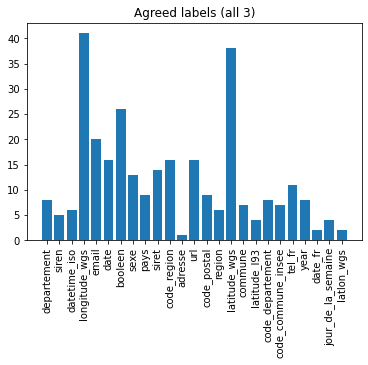

In [58]:
import matplotlib.pyplot as plt
from collections import Counter
agreements_count = Counter(agreements)
plt.bar(agreements_count.keys(), agreements_count.values())
plt.xticks(rotation=90)
plt.title("Agreed labels (all 3)")

Text(0.5, 1.0, 'Partial agreed labels (2)')

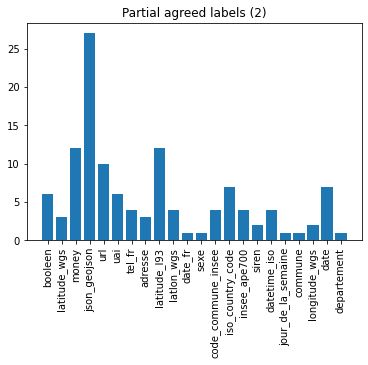

In [42]:
p_agreements_count = Counter(partial_agreements)
plt.bar(p_agreements_count.keys(), p_agreements_count.values())
plt.xticks(rotation=90)
plt.title("Partial agreed 2 labels")

There are no total disagreements for the old type

### What are the distributions of the agreed, partially agreed and disagreed labels (old types) ?

Text(0.5, 1.0, 'Agreed labels (all 3)')

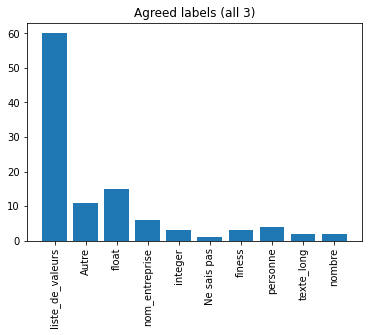

In [50]:
agreements_count_n = Counter(agreements_new)
plt.bar(agreements_count_n.keys(), agreements_count_n.values())
plt.xticks(rotation=90)
plt.title("Agreed labels (all 3)")

Text(0.5, 1.0, 'Partial agreed two labels')

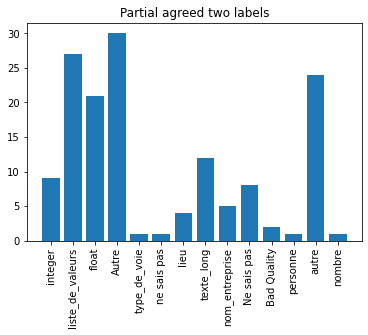

In [51]:
partial_agreements_new_count = Counter(partial_agreements_new)
plt.bar(partial_agreements_new_count.keys(), partial_agreements_new_count.values())
plt.xticks(rotation=90)
plt.title("Partial agreed two labels")

Text(0.5, 1.0, 'Total disagreements')

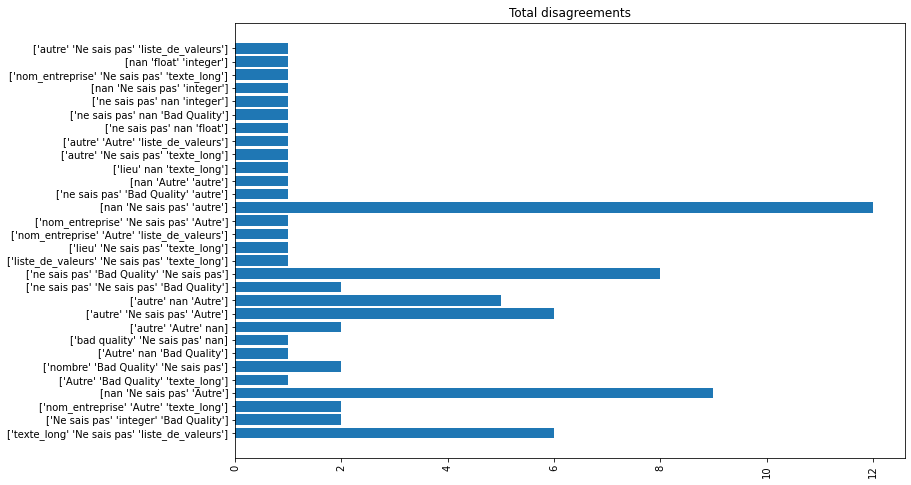

In [64]:
disagreements_new_counter = Counter(total_disagreements_new)
plt.barh(list(disagreements_new_counter.keys()), list(disagreements_new_counter.values()))
plt.xticks(rotation=90)
plt.title("Total disagreements")